Fed dataset has 873 data points with 7 variables each.


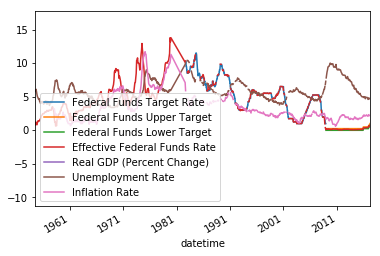

In [119]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import Series
from IPython.display import display
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# def dt_parse(date_string):

#     dt = pd.datetime.strptime(date_string, '%Y %m %d')

#     return dt

# data = pd.read_csv('index.csv',index_col='datetime', parse_dates={'datetime': ['Year','Month','Day']}, date_parser=dt_parse)
# Load the federal reserve dataset
try:
#     data = pd.read_csv('index.csv', parse_dates = True, index_col = [0,1,2])
    data = pd.read_csv('index2.csv',index_col='datetime', parse_dates={'datetime': ['Year','Month','Day']}, date_parser=lambda x: pd.datetime.strptime(x, '%Y %m %d'))
    print "Fed dataset has {} data points with {} variables each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

data.plot()
pyplot.show()

In [120]:
data_log = np.log(data)
data_log['Real GDP (Percent Change)'] = data['Real GDP (Percent Change)']
data_log['Federal Funds Lower Target'] = data['Federal Funds Lower Target']
# data_log['Federal Funds Target Rate'] = data['Federal Funds Target Rate']

data_log['Future Interest Rate'] = data_log['Effective Federal Funds Rate']
data_log['Future Interest Rate'] = data_log['Future Interest Rate'].shift(-1)

interest_rate = data_log['Future Interest Rate']
features = data_log.drop('Future Interest Rate', axis = 1)

print "\nTarget column:\n {}".format(interest_rate.head())
print "\nDataset column:\n {}".format(features.head())



Target column:
 datetime
1954-07-01    0.198851
1954-08-01    0.058269
1954-09-01   -0.162519
1954-10-01   -0.186330
1954-11-01    0.246860
Name: Future Interest Rate, dtype: float64

Dataset column:
             Federal Funds Target Rate  Federal Funds Upper Target  \
datetime                                                            
1954-07-01                        NaN                         NaN   
1954-08-01                        NaN                         NaN   
1954-09-01                        NaN                         NaN   
1954-10-01                        NaN                         NaN   
1954-11-01                        NaN                         NaN   

            Federal Funds Lower Target  Effective Federal Funds Rate  \
datetime                                                               
1954-07-01                         NaN                     -0.223144   
1954-08-01                         NaN                      0.198851   
1954-09-01                

/Users/jovanimartinezrico/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/jovanimartinezrico/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [121]:
interest_rate = interest_rate.fillna(0)
features = features.fillna(0)
print "\nTarget column:\n {}".format(interest_rate.head())
print "\nDataset column:\n {}".format(features.head())


Target column:
 datetime
1954-07-01    0.198851
1954-08-01    0.058269
1954-09-01   -0.162519
1954-10-01   -0.186330
1954-11-01    0.246860
Name: Future Interest Rate, dtype: float64

Dataset column:
             Federal Funds Target Rate  Federal Funds Upper Target  \
datetime                                                            
1954-07-01                        0.0                         0.0   
1954-08-01                        0.0                         0.0   
1954-09-01                        0.0                         0.0   
1954-10-01                        0.0                         0.0   
1954-11-01                        0.0                         0.0   

            Federal Funds Lower Target  Effective Federal Funds Rate  \
datetime                                                               
1954-07-01                         0.0                     -0.223144   
1954-08-01                         0.0                      0.198851   
1954-09-01                

In [125]:
def split_data(X, y):
    print "********************Splitting the Data******************"
    training_size = int((len(X)-1) * 0.60)
    X_train, X_test = X[0:training_size], X[training_size:len(X)-1] 
    y_train, y_test = y[0:training_size], y[training_size:len(X)-1]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(features, interest_rate)

********************Splitting the Data******************


In [126]:
from sklearn.dummy import DummyRegressor

def benchmark(X_train, X_test, y_train, y_test):
    print "********************DummyRegressor Model******************"
    model = DummyRegressor()
    model.fit(X_train, y_train)
    print '{}'.format(model.score(X_test, y_test))
    return model

benchmark(X_train, X_test, y_train, y_test)

********************DummyRegressor Model******************
-0.668979682944


DummyRegressor(constant=None, quantile=None, strategy='mean')

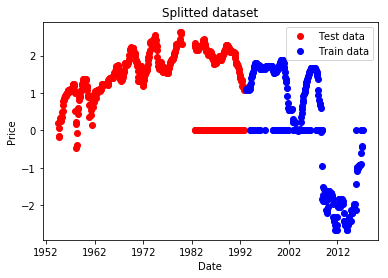

In [127]:

def plot_split_results(X_test, X_train, y_test, y_train):
    stock_date_test = pd.DataFrame()
    stock_date_train = pd.DataFrame()
    stock_date_test['Date'] = X_test.index
    stock_date_train['Date'] = X_train.index
    
    fig, ax = plt.subplots()
    ax.plot_date(stock_date_test, y_test, color ='r', label = 'Test data', linewidth=1)
    ax.plot_date(stock_date_train, y_train, color ='b', label = 'Train data', linewidth=1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    
    plt.legend()
    plt.title('Splitted dataset')
    plt.show()
    
plot_split_results(X_train, X_test, y_train, y_test)